# Modelo de Regresion Lineal para Empresa Aliada

In [86]:
# importando librerias relevantes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/vorte/Downloads/')
import warnings
warnings.filterwarnings('ignore')

In [87]:
# Cargando Dataframes, eliminando datos nulos y duplicados

producto = pd.read_csv('DIM_PRODUCT.csv').dropna()
producto = producto.drop_duplicates()

# Segundo dataframe
segmento = pd.read_csv('DIM_SEGMENT.csv').dropna()
segmento = segmento.drop_duplicates()

# Tercer dataframe
calendario = pd.read_csv('DIM_CALENDAR.csv').dropna()
calendario.drop_duplicates()

# cuarto dataframe
sales = pd.read_csv('FACT_SALES.csv').dropna()
sales = sales.drop_duplicates()

#### Limpieza y EDA del primer DF

In [89]:
producto.head()

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3
0,INDS. ALEN,CLORALEX,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
1,INDS. ALEN,CLORALEX,0000075000608,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
2,INDS. ALEN,CLORALEX,0000075000615,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
3,INDS. ALEN,CLORALEX,0000075000622,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO
4,INDS. ALEN,CLORALEX,0000075000639,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,1,LIQUIDO,CLORO,CLORO,NO DEFINIDO


In [90]:
producto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 504
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MANUFACTURER      497 non-null    object
 1   BRAND             497 non-null    object
 2   ITEM              497 non-null    object
 3   ITEM_DESCRIPTION  497 non-null    object
 4   CATEGORY          497 non-null    int64 
 5   FORMAT            497 non-null    object
 6   ATTR1             497 non-null    object
 7   ATTR2             497 non-null    object
 8   ATTR3             497 non-null    object
dtypes: int64(1), object(8)
memory usage: 38.8+ KB


In [91]:
producto['BRAND'].value_counts()

BRAND
CLORALEX                     113
VANISH                       103
CLOROX                        92
OXI CLEAN                     31
BANDERA                       25
DR.BECKMANN                   22
OTHERS MARCA UNIF.            20
VANISH PODER 02               10
BLANCATEL                      9
CLORTEX                        8
LYSOL                          8
CLARASOL                       6
LOS PATITOS                    6
SHOUT                          5
VANISH CRYSTAL WHITE           4
TIDE                           4
IBERIA                         4
PATITO                         3
LA VALENCIANA                  3
CUELLOS PUNOS Y MANCHITAS      3
SANYTOL                        3
MARIPOSA                       2
CLORO 10                       2
HARPIC                         2
BCLORHADA                      2
CARISMA                        1
PURO SOL                       1
ARTIC WHITE                    1
CLORALUZ                       1
RADIANTE                       1
VANI

In [92]:
producto[producto['CATEGORY'] != 1]

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3


In [93]:
producto[producto['ATTR1'] != 'CLORO']

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3
10,RECKITT,LYSOL,0019200958714,LYSOL SANITIZANTE DE ROPA CRISP LINEN BOT 1.2 ...,1,LIQUIDO,SANITIZANTE,SANITIZANTE,SANITIZANTE
11,P&G,TIDE,0037000018704,9TIDE LIPIADOR DE ROPA QUITAMANCHAS PLUMON 10 ...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR
12,P&G,TIDE,0037000213215,9TIDE ADIVITO QUITAMANCHAS 220 GR 0037000213215,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,OTR. TIPOS
13,P&G,TIDE,0037000830870,9TIDE BOOST VIVID WHITE + BRIGHT BOL 18CAP = 4...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,OTR. TIPOS
14,P&G,TIDE,0037000889281,TIDE MULTI PURPOSE OXI STAIN REMOVER BOT 1.72K...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,OTR. TIPOS
...,...,...,...,...,...,...,...,...,...
493,RECKITT,VANISH,7891035040276,VANISH SUPER BARRA WHITE QUITA MANCHAS 68GR 78...,1,BARRA,SAFE BLEACH,FABRIC TREATMENT,BLANCO
496,IBERIA,IBERIA,8411660210012,IBERIA REVOLUTION QUITA MANCHAS DIARIAS ROLL O...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR
497,IBERIA,IBERIA,8411660210029,IBERIA REVOLUTION QUITA MANCHAS RESISTENTES BO...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR
498,IBERIA,IBERIA,8411660210036,IBERIA REVOLUTION QUITA MANCHAS ACCIDENTALES B...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR


In [94]:
producto[producto['ATTR1'] != 'CLORO']

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3
10,RECKITT,LYSOL,0019200958714,LYSOL SANITIZANTE DE ROPA CRISP LINEN BOT 1.2 ...,1,LIQUIDO,SANITIZANTE,SANITIZANTE,SANITIZANTE
11,P&G,TIDE,0037000018704,9TIDE LIPIADOR DE ROPA QUITAMANCHAS PLUMON 10 ...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR
12,P&G,TIDE,0037000213215,9TIDE ADIVITO QUITAMANCHAS 220 GR 0037000213215,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,OTR. TIPOS
13,P&G,TIDE,0037000830870,9TIDE BOOST VIVID WHITE + BRIGHT BOL 18CAP = 4...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,OTR. TIPOS
14,P&G,TIDE,0037000889281,TIDE MULTI PURPOSE OXI STAIN REMOVER BOT 1.72K...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,OTR. TIPOS
...,...,...,...,...,...,...,...,...,...
493,RECKITT,VANISH,7891035040276,VANISH SUPER BARRA WHITE QUITA MANCHAS 68GR 78...,1,BARRA,SAFE BLEACH,FABRIC TREATMENT,BLANCO
496,IBERIA,IBERIA,8411660210012,IBERIA REVOLUTION QUITA MANCHAS DIARIAS ROLL O...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR
497,IBERIA,IBERIA,8411660210029,IBERIA REVOLUTION QUITA MANCHAS RESISTENTES BO...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR
498,IBERIA,IBERIA,8411660210036,IBERIA REVOLUTION QUITA MANCHAS ACCIDENTALES B...,1,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR


In [95]:
producto['FORMAT'].value_counts()

FORMAT
LIQUIDO    319
POLVO       94
GEL         72
BARRA       11
TOALLAS      1
Name: count, dtype: int64

In [96]:
producto['ATTR1'].value_counts()

ATTR1
CLORO          241
SAFE BLEACH    218
PRELAVADOR      27
SANITIZANTE     11
Name: count, dtype: int64

In [97]:
producto['ATTR2'].value_counts()

ATTR2
FABRIC TREATMENT    245
CLORO               241
SANITIZANTE          11
Name: count, dtype: int64

Tenemos un DataFrame con 9 columnas, mostrando 497 productos, de 32 marcas diferentes pero de la misma categoría, 5 formatos diferentes y con el tercer atributo no definido, en su mayoría.

Además es muy confuso como distribuye los atributos que parecen ser los mismos en dos diferentes columnas... parece que podemos quedarnos solo con el atributo 1 que cuenta con mas caracteristicas.
Se prodecera a borrar las columnas inecesarias

In [99]:
producto.drop(columns = ['CATEGORY','ATTR2','ATTR3'], inplace= True)
producto.head()

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,FORMAT,ATTR1
0,INDS. ALEN,CLORALEX,0000075000592,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,LIQUIDO,CLORO
1,INDS. ALEN,CLORALEX,0000075000608,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...,LIQUIDO,CLORO
2,INDS. ALEN,CLORALEX,0000075000615,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,LIQUIDO,CLORO
3,INDS. ALEN,CLORALEX,0000075000622,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
4,INDS. ALEN,CLORALEX,0000075000639,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,LIQUIDO,CLORO


#### Limpieza y EDA del segundo DF

In [101]:
sales.head()

,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5


In [102]:
# Correoborando que ese codigo de ITEM tan extraño si exista en la lista de productos
producto[producto['ITEM']=='7501058792808BP2']	

# Sí existe, se dejara tal y como esta

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,FORMAT,ATTR1
312,RECKITT,VANISH,7501058792808BP2,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,POLVO,SAFE BLEACH


In [103]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   WEEK                         122002 non-null  object 
 1   ITEM_CODE                    122002 non-null  object 
 2   TOTAL_UNIT_SALES             122002 non-null  float64
 3   TOTAL_VALUE_SALES            122002 non-null  float64
 4   TOTAL_UNIT_AVG_WEEKLY_SALES  122002 non-null  float64
 5   REGION                       122002 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.6+ MB


Este DF esta más completo ya que cuenta con 122002 observaciones de ventas.

Observamos que en lugar de la fecha nos muestra la semana en la que fue vendido cada producto. Lo cual asume un problema si no esta en el formato correcto.

Hasta ahora no parece que podamos borrar ninguna columna. Todas pueden resultar significativas.

Aunque si nuestro objetivo principal es predecir el valor total de ventas como variable depentiente Y. Bien puede borrarse la variable Region, al no ser relevante.

#### Limpieza y EDA del tercer DF

In [106]:
segmento

,CATEGORY,ATTR1,ATTR2,ATTR3,FORMAT,SEGMENT
0,1,CLORO,CLORO,BAMBINO,LIQUIDO,BLEACH
1,1,CLORO,CLORO,GERMICIDA,LIQUIDO,BLEACH
2,1,CLORO,CLORO,MASCOTAS,LIQUIDO,BLEACH
3,1,CLORO,CLORO,MULTIUSOS,GEL,BLEACH
4,1,CLORO,CLORO,MULTIUSOS,LIQUIDO,BLEACH
5,1,CLORO,CLORO,NO DEFINIDO,LIQUIDO,BLEACH
6,1,CLORO,CLORO,NO DEFINIDO,POLVO,BLEACH
7,1,CLORO,CLORO,OTR. TIPOS,LIQUIDO,BLEACH
8,1,CLORO,CLORO,OTR. TIPOS,POLVO,BLEACH
9,1,CLORO,CLORO,ROPA BEBE,LIQUIDO,BLEACH


Este DF no tiene mucho sentido, ayq eu aunque contiene la columna segmento, al no contener columna ITEM, no se puede relacionar, ademas de que tods siguen siendo categoria 1

#### Limpieza y EDA del cuarto DF

In [109]:
calendario.head()

,WEEK,YEAR,MONTH,WEEK_NUMBER,DATE
0,01-21,2021,1,1,2021-01-10
1,02-21,2021,1,2,2021-01-17
2,03-21,2021,1,3,2021-01-24
3,04-21,2021,1,4,2021-01-31
4,05-21,2021,2,5,2021-02-07


Este último DataFrame nos permitira hacer una prediccion del tipo serie de tiempo, pero clumnas como Month y Week_Numer son irrelevantes, solo necesitamos week, year y Date...
Por otro lado no me parece haber visto el año 2021 en el DF de Ventas.. esta por corroborarse

In [111]:
calendario.drop(columns = ['MONTH','WEEK_NUMBER'], inplace = True)
calendario.head()

,WEEK,YEAR,DATE
0,01-21,2021,2021-01-10
1,02-21,2021,2021-01-17
2,03-21,2021,2021-01-24
3,04-21,2021,2021-01-31
4,05-21,2021,2021-02-07


In [112]:
calendario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   WEEK    156 non-null    object
 1   YEAR    156 non-null    int64 
 2   DATE    156 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.8+ KB


Contiene 156 semanas osea, 3 años... pero no se sabe si coincide con el de ventas

## Eligiendo el Modelo de Prediccion:
Por ahora se pueden realizar dos tipos de Modelos, se puede simplemente usar el  DF 'Sales.csv', para un modelo de Regresion Multiple; ó se pueden concatenar junto con el df 'Calendario' para un modelo de linea de tiempo.

Se Crearan dos diferentes DataFrames, uno para la Regresion Lineal (df_reg), y, uno más para el modelo Arima (df_time)

#### Concatenando el primer DF

In [116]:
# Cambiando el nombre de la columna ITEM_Code en el DF sales para que funcione la concatenacion
sales.rename(columns = {'ITEM_CODE':'ITEM'}, inplace = True)
print(sales.columns)
print(producto.columns)

Index(['WEEK', 'ITEM', 'TOTAL_UNIT_SALES', 'TOTAL_VALUE_SALES',
       'TOTAL_UNIT_AVG_WEEKLY_SALES', 'REGION'],
      dtype='object')
Index(['MANUFACTURER', 'BRAND', 'ITEM', 'ITEM_DESCRIPTION', 'FORMAT', 'ATTR1'], dtype='object')


In [117]:
df_reg = pd.merge(sales, producto, on = 'ITEM', how = 'inner')
df_reg

,WEEK,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,POLVO,SAFE BLEACH
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,POLVO,SAFE BLEACH
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,POLVO,SAFE BLEACH
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,POLVO,SAFE BLEACH
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,POLVO,SAFE BLEACH
...,...,...,...,...,...,...,...,...,...,...,...
121997,26-23,7501058792778BP1,1.192,150.829,4.000,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,VANISHOXIACTIONROSABOTE900GR+MMCRYSTALWHITEDOY...,POLVO,SAFE BLEACH
121998,26-23,7501058757630,1.947,235.416,2.797,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,VANISH PODER O2 PRE-LAVADOR BOT.ATOM. 650 ML N...,LIQUIDO,PRELAVADOR
121999,26-23,7501058753441,18.013,429.289,9.102,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,VANISH PODER O2 DOYPACK 120 GR 7501058753441,POLVO,SAFE BLEACH
122000,26-23,7702626204208BP1,21.152,210.276,22.172,TOTAL AUTOS SCANNING MEXICO,RECKITT,VANISH,VANISH PODER 02 INTELIGENCE SIN CLORO SOBRE 30...,POLVO,SAFE BLEACH


In [118]:
# Corroborando que si de inueron bien los DF a traves del codigo ITEM y que no queden nulos
df_reg.info()
# Perfecto ,merge() funciono perfecto!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   WEEK                         122002 non-null  object 
 1   ITEM                         122002 non-null  object 
 2   TOTAL_UNIT_SALES             122002 non-null  float64
 3   TOTAL_VALUE_SALES            122002 non-null  float64
 4   TOTAL_UNIT_AVG_WEEKLY_SALES  122002 non-null  float64
 5   REGION                       122002 non-null  object 
 6   MANUFACTURER                 122002 non-null  object 
 7   BRAND                        122002 non-null  object 
 8   ITEM_DESCRIPTION             122002 non-null  object 
 9   FORMAT                       122002 non-null  object 
 10  ATTR1                        122002 non-null  object 
dtypes: float64(3), object(8)
memory usage: 10.2+ MB


In [119]:
#### Concatenando el segundo DF

df_tiempo = pd.merge(calendario, sales, on = 'WEEK', how = 'inner')
df_tiempo.head()

,WEEK,YEAR,DATE,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
0,01-22,2022,2022-01-09,7501268200001,0.003,0.027,3.000,TOTAL AUTOS AREA 1
1,01-22,2022,2022-01-09,7501268200049,0.006,0.112,2.000,TOTAL AUTOS AREA 1
2,01-22,2022,2022-01-09,7501268200070,0.044,1.478,6.286,TOTAL AUTOS AREA 1
3,01-22,2022,2022-01-09,0757037517123,0.639,52.873,3.920,TOTAL AUTOS AREA 1
4,01-22,2022,2022-01-09,7501080954786,1.306,23.738,5.464,TOTAL AUTOS AREA 1


In [120]:
df_tiempo.info()
# perfectamente concatenado, no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122002 entries, 0 to 122001
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   WEEK                         122002 non-null  object 
 1   YEAR                         122002 non-null  int64  
 2   DATE                         122002 non-null  object 
 3   ITEM                         122002 non-null  object 
 4   TOTAL_UNIT_SALES             122002 non-null  float64
 5   TOTAL_VALUE_SALES            122002 non-null  float64
 6   TOTAL_UNIT_AVG_WEEKLY_SALES  122002 non-null  float64
 7   REGION                       122002 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 7.4+ MB


In [121]:
df_tiempo.describe()

,YEAR,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES
count,122002.000000,122002.000000,122002.000000,122002.000000
mean,2022.334396,3.211097,90.513761,10.099904
std,0.471781,14.496009,350.236505,22.650142
min,2022.000000,0.000000,0.001000,0.042000
25%,2022.000000,0.063000,2.662000,2.316000
50%,2022.000000,0.367000,16.812000,3.993500
75%,2023.000000,1.520000,62.961500,8.898000
max,2023.000000,504.681000,12236.759000,794.000000


Se observa ya con nuestro nuevo DF_tiempo que se ha eliminado el año 2021, solo hay ventas registradas en el 2022 y 2023. una media de 90.5 K que ya nos ayudara con nuestras predicciones una desviacion estandar de 350.2 lo cual es demasiado para una desviacion estnadar, mas alta que la media.. nos habla de datos muy moviles.

# Eleccion del Modelo:
Debido a la facil organización de los datos basados en series de tiempo, se utilizará primero el modelo ARIMA para la predicción de las ventas, quiza despues se agregue una regresion lineal para ver las similitudes o diferencias entre los modelos.

In [124]:
# observando como se comportan las fechas:
df_tiempo[0:57]

,WEEK,YEAR,DATE,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
0,01-22,2022,2022-01-09,7501268200001,0.003,0.027,3.000,TOTAL AUTOS AREA 1
1,01-22,2022,2022-01-09,7501268200049,0.006,0.112,2.000,TOTAL AUTOS AREA 1
2,01-22,2022,2022-01-09,7501268200070,0.044,1.478,6.286,TOTAL AUTOS AREA 1
3,01-22,2022,2022-01-09,0757037517123,0.639,52.873,3.920,TOTAL AUTOS AREA 1
4,01-22,2022,2022-01-09,7501080954786,1.306,23.738,5.464,TOTAL AUTOS AREA 1
5,01-22,2022,2022-01-09,7501080954793,0.490,29.070,3.379,TOTAL AUTOS AREA 1
6,01-22,2022,2022-01-09,7501080955103,0.381,51.242,4.379,TOTAL AUTOS AREA 1
7,01-22,2022,2022-01-09,7501080955486,0.337,21.913,2.612,TOTAL AUTOS AREA 1
8,01-22,2022,2022-01-09,7501080900165,1.693,28.913,7.491,TOTAL AUTOS AREA 1
9,01-22,2022,2022-01-09,7501080900134,0.252,11.044,2.965,TOTAL AUTOS AREA 1


como se puede ver, la misma fecha se repite tantas veces como productos haya, por lo que es necesario seleccionar solo algun prodecto en especifico para predecir sus ventas, ya que de no hacerlo, se tomaria casa observacion como una fecha y el modelo no funcionaría.

### Seleccion de productos a utilizar en el modelo:

In [126]:
# Eligiremos al producto más vendido, tomando en cuenta el numero maximo de ventas segun el EDA.
df_tiempo[df_tiempo['TOTAL_UNIT_SALES']>500]

,WEEK,YEAR,DATE,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
112598,22-23,2023,2023-06-05,0000075000622,504.681,11377.283,181.344,TOTAL AUTOS SCANNING MEXICO


In [127]:
# Encontrando que producto es:
producto[producto['ITEM']== '0000075000622']

,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,FORMAT,ATTR1
3,INDS. ALEN,CLORALEX,0000075000622,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO


El producto más vendido es Cloralex el Rendidor en la botella de 2 Litros, de la marca Cloralex. en formato líquido

Otra opcion seria poder sumar el valor total de ventas por fechas, asi predecir una cantidad total de ventas para las siguientes semanas, pero para ello tendríamos que olvidarnos completamente de los productos, por lo que por ahora se hara el proyecto tomando en cuenta solo a este producto

In [130]:
df_time = df_tiempo[df_tiempo['ITEM']== '0000075000622']
df_time

,WEEK,YEAR,DATE,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION
149,01-22,2022,2022-01-09,0000075000622,58.178,1341.204,98.439,TOTAL AUTOS AREA 1
366,01-22,2022,2022-01-09,0000075000622,99.568,2213.250,165.122,TOTAL AUTOS AREA 2
606,01-22,2022,2022-01-09,0000075000622,371.038,8393.597,136.361,TOTAL AUTOS SCANNING MEXICO
788,01-22,2022,2022-01-09,0000075000622,52.627,1256.365,136.340,TOTAL AUTOS AREA 3
1008,01-22,2022,2022-01-09,0000075000622,53.839,1199.827,150.809,TOTAL AUTOS AREA 4
...,...,...,...,...,...,...,...,...
121072,28-23,2023,2023-07-17,0000075000622,51.012,1145.945,128.494,TOTAL AUTOS AREA 5
121210,28-23,2023,2023-07-17,0000075000622,44.554,1178.490,73.765,TOTAL AUTOS AREA 1
121405,28-23,2023,2023-07-17,0000075000622,100.177,2185.881,162.361,TOTAL AUTOS AREA 2
121696,28-23,2023,2023-07-17,0000075000622,44.910,1034.617,118.185,TOTAL AUTOS AREA 6


Tenemos 560 observaciones, lo cual es muy buen numero, sin embargo las fechas siguen repitiendose por que tenemos 5 regiones diferentes, se debe decidir ahora si sumamos el total de ventas por las 5 regiones o elegimos solo una region para el analisis.

Despues de un analisis, se conservaran las 5 regiones y se considerará solamente la suma de la columna de ventas totales para la prediccion

In [133]:
# Eliminando el resto de las columnas
df_time.drop(columns = ['WEEK','ITEM','TOTAL_UNIT_SALES','TOTAL_UNIT_AVG_WEEKLY_SALES','REGION'],inplace = True)
df_time.head()

,YEAR,DATE,TOTAL_VALUE_SALES
149,2022,2022-01-09,1341.204
366,2022,2022-01-09,2213.250
606,2022,2022-01-09,8393.597
788,2022,2022-01-09,1256.365
1008,2022,2022-01-09,1199.827


In [134]:
df_time =df_time.groupby(['DATE'])['TOTAL_VALUE_SALES'].sum()
df_time

DATE
2022-01-09    16787.194
2022-01-16    16019.410
2022-01-23    14341.980
2022-01-30    13819.164
2022-02-06    14324.646
                ...    
2023-06-19    16001.298
2023-06-26    15668.968
2023-07-03    19734.475
2023-07-10    18089.757
2023-07-17    16130.164
Name: TOTAL_VALUE_SALES, Length: 80, dtype: float64

In [135]:
# Nos lo dio como serie entonces hay que convertirlo en DF
df_time = pd.DataFrame(df_time)
df_time.head()

,TOTAL_VALUE_SALES
DATE,
2022-01-09,16787.194
2022-01-16,16019.410
2022-01-23,14341.980
2022-01-30,13819.164
2022-02-06,14324.646


In [136]:
# Corroborando que el index este en tipo datetime:
df_time.index 

Index(['2022-01-09', '2022-01-16', '2022-01-23', '2022-01-30', '2022-02-06',
       '2022-02-13', '2022-02-20', '2022-02-27', '2022-03-06', '2022-03-13',
       '2022-03-20', '2022-03-27', '2022-04-03', '2022-04-10', '2022-04-17',
       '2022-04-24', '2022-05-01', '2022-05-08', '2022-05-15', '2022-05-22',
       '2022-05-29', '2022-06-05', '2022-06-12', '2022-06-19', '2022-06-26',
       '2022-07-03', '2022-07-10', '2022-07-17', '2022-07-24', '2022-07-31',
       '2022-08-07', '2022-08-14', '2022-08-21', '2022-08-28', '2022-09-04',
       '2022-09-11', '2022-09-18', '2022-09-25', '2022-10-02', '2022-10-09',
       '2022-10-16', '2022-10-23', '2022-10-30', '2022-11-06', '2022-11-13',
       '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11', '2022-12-18',
       '2022-12-25', '2023-01-01', '2023-01-09', '2023-01-16', '2023-01-23',
       '2023-01-30', '2023-02-06', '2023-02-13', '2023-02-20', '2023-02-27',
       '2023-03-06', '2023-03-13', '2023-03-20', '2023-03-27', '2023-04-03',

In [137]:
df_time.index = pd.to_datetime(df_time.index)
df_time.index   
# Listo ahora si ya quedó

DatetimeIndex(['2022-01-09', '2022-01-16', '2022-01-23', '2022-01-30',
               '2022-02-06', '2022-02-13', '2022-02-20', '2022-02-27',
               '2022-03-06', '2022-03-13', '2022-03-20', '2022-03-27',
               '2022-04-03', '2022-04-10', '2022-04-17', '2022-04-24',
               '2022-05-01', '2022-05-08', '2022-05-15', '2022-05-22',
               '2022-05-29', '2022-06-05', '2022-06-12', '2022-06-19',
               '2022-06-26', '2022-07-03', '2022-07-10', '2022-07-17',
               '2022-07-24', '2022-07-31', '2022-08-07', '2022-08-14',
               '2022-08-21', '2022-08-28', '2022-09-04', '2022-09-11',
               '2022-09-18', '2022-09-25', '2022-10-02', '2022-10-09',
               '2022-10-16', '2022-10-23', '2022-10-30', '2022-11-06',
               '2022-11-13', '2022-11-20', '2022-11-27', '2022-12-04',
               '2022-12-11', '2022-12-18', '2022-12-25', '2023-01-01',
               '2023-01-09', '2023-01-16', '2023-01-23', '2023-01-30',
      

## Modelo Arima para el producto 0000075000622 CLORALEX El Rendidor Líquido 2000 ML

<Axes: xlabel='DATE'>

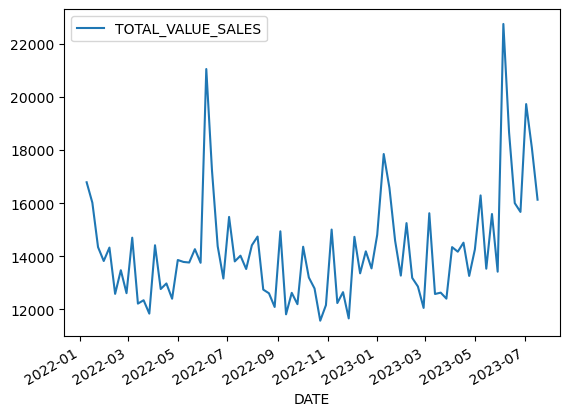

In [139]:
# Revisando los datos crudos para ver su tendecia:
df_time.plot()

Hay picos muy altos pero parece que puede funcionar

In [141]:
# Caminata aleatoria para revisar la estacionariedad deseada:
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(df_time)
print('El valor P de la prueba AdFuller es',resultado[1])

El valor P de la prueba AdFuller es 0.6713801887518702


Aunque el valor P no es tan alto, sí supera el 0.5 por lo que aún no se puede comprobar ni negar que la serie sea estacionaria, se relaizaran los graficos de autocorrelacion para comproarlo

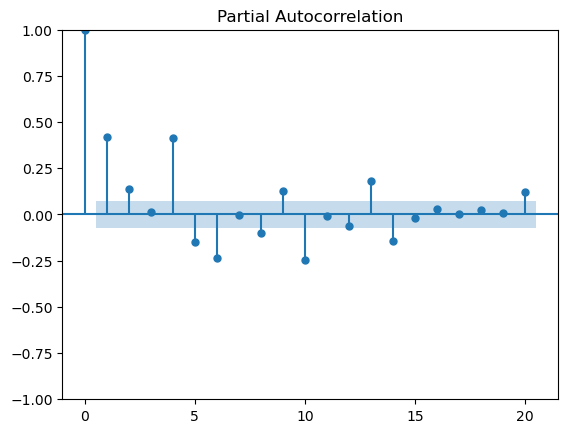

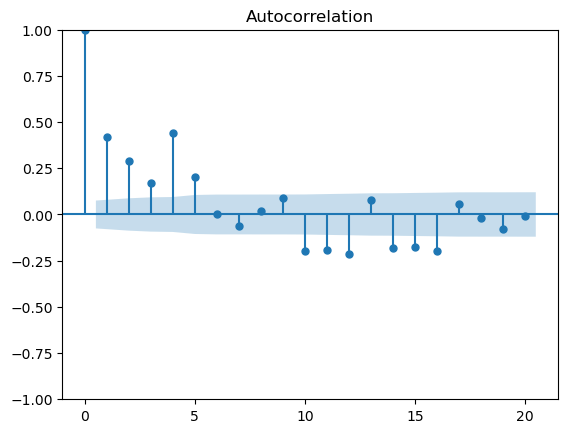

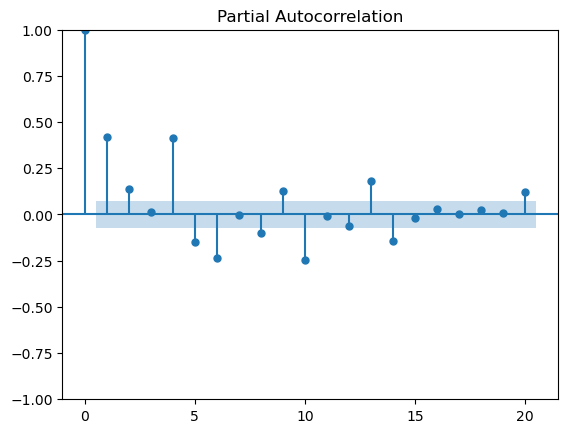

In [143]:
# Autocorrelación:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_time['TOTAL_VALUE_SALES'],lags = 20, alpha = 0.5)
plot_pacf(df_time['TOTAL_VALUE_SALES'],lags = 20, alpha = 0.5)

Aunque algunas barras sobresalen, los correlogramas si muestran que la serie de tiemop es estacionaria sin ninguna tendencia muy fuerte, por lo que sí puede usarse el modelo Arima para predecir

#### Interpretando un poco más:
El hecho de que las barras sobresalgan por encima del grado de confianza alpha, sigue mostrando estacionariedad ya que nunca sube tanto como las orimeras dos lineas en el caso de la autocorrelacion parcial y si se nota como va bajando en la autocorrelacion.

In [145]:
# Division en Muestra y Prueba
len_train = int(len(df_time)*0.8)
print(len_train)
len_test = int(len(df_time)*0.2)
print(len_test)

train = df_time[:len_train]
test = df_time[len_train:]
print('Tenemos ', len(train), 'datos de entrenamiento y,', len(test), 'datos de prueba')

64
16
Tenemos  64 datos de entrenamiento y, 16 datos de prueba


In [146]:
# importamdo la libreria:
from statsmodels.tsa.arima.model import ARIMA

# Creando un bucle para encontrar los valores AIC mpas bajos:

resultados =[]

for p in range(0,3):
    for d in range(0,3):
        for q in range(0,3):
            try:
                modelo = ARIMA(train['TOTAL_VALUE_SALES'], order =(p,d,q)).fit()
                resultados.append({'p':p,'d':d,'q':q,'AIC =': modelo.aic})
            except:
                    continue
resultados

[{'p': 0, 'd': 0, 'q': 0, 'AIC =': 1134.6934112696508},
 {'p': 0, 'd': 0, 'q': 1, 'AIC =': 1131.157529119265},
 {'p': 0, 'd': 0, 'q': 2, 'AIC =': 1129.7120143899701},
 {'p': 0, 'd': 1, 'q': 0, 'AIC =': 1132.3276724894265},
 {'p': 0, 'd': 1, 'q': 1, 'AIC =': 1121.8453277982726},
 {'p': 0, 'd': 1, 'q': 2, 'AIC =': 1120.0835880733941},
 {'p': 0, 'd': 2, 'q': 0, 'AIC =': 1178.7824601210775},
 {'p': 0, 'd': 2, 'q': 1, 'AIC =': 1135.4671521295113},
 {'p': 0, 'd': 2, 'q': 2, 'AIC =': 1137.4365716400475},
 {'p': 1, 'd': 0, 'q': 0, 'AIC =': 1129.3897752066366},
 {'p': 1, 'd': 0, 'q': 1, 'AIC =': 1130.9188588872053},
 {'p': 1, 'd': 0, 'q': 2, 'AIC =': 1124.6192102640616},
 {'p': 1, 'd': 1, 'q': 0, 'AIC =': 1127.062644481874},
 {'p': 1, 'd': 1, 'q': 1, 'AIC =': 1117.8358634180925},
 {'p': 1, 'd': 1, 'q': 2, 'AIC =': 1119.7845124638366},
 {'p': 1, 'd': 2, 'q': 0, 'AIC =': 1160.471318847129},
 {'p': 1, 'd': 2, 'q': 1, 'AIC =': 1137.6408348711466},
 {'p': 1, 'd': 2, 'q': 2, 'AIC =': 1138.97991014900

El buclue nos ha arrojado 27 diferentes combinaciones.. todas muy altas, siendo PDQ 1,1,1 el mas bajo
### Nota:
Se probó el modelo con los 3 AIC mas bajos y ningun modelo fue convicente.

In [148]:
# Creando el modelo con el AIC mas bajo
train = train.asfreq('W')

modelo = ARIMA(train, order =(1,1,1)).fit()
resultado = modelo.aic
print('El AIC para ARIMA1 es:', resultado)

El AIC para ARIMA1 es: 904.9710094537286


In [149]:
print(modelo.summary())

# Por alguna razon al imprimir el summary el AIC no coincide.. lo cual me hace dudar y buscar otro modelo

                               SARIMAX Results                                
Dep. Variable:      TOTAL_VALUE_SALES   No. Observations:                   64
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -449.486
Date:                Mon, 20 Oct 2025   AIC                            904.971
Time:                        11:41:48   BIC                            911.400
Sample:                    01-09-2022   HQIC                           907.500
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4105      0.121      3.393      0.001       0.173       0.648
ma.L1         -0.9995      0.085    -11.773      0.000      -1.166      -0.833
sigma2      2.287e+06   3.77e-08   6.07e+13      0.0

Coincide y por lo tanto es el que se va a utilizar.
#### Nota: 
importante revisar el summary siempre para ver que de hecho coincida

In [151]:
# Generando las predicciones Y_pred:
predicciones = modelo.forecast(len(test))
predicciones

2023-04-02    13456.794044
2023-04-09    13456.786576
2023-04-16    13456.783510
2023-04-23    13456.782252
2023-04-30    13456.781735
2023-05-07    13456.781523
2023-05-14    13456.781436
2023-05-21    13456.781400
2023-05-28    13456.781386
2023-06-04    13456.781380
2023-06-11    13456.781377
2023-06-18    13456.781376
2023-06-25    13456.781376
2023-07-02    13456.781376
2023-07-09    13456.781376
2023-07-16    13456.781376
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [152]:
# intervalos de confianza:
intervalos = modelo.get_forecast(len(test)).conf_int()
intervalos

,lower TOTAL_VALUE_SALES,upper TOTAL_VALUE_SALES
2023-04-02,10136.127545,16777.460544
2023-04-09,10136.118148,16777.455003
2023-04-16,10136.113614,16777.453406
2023-04-23,10136.111076,16777.453428
2023-04-30,10136.109357,16777.454114
2023-05-07,10136.107974,16777.455072
2023-05-14,10136.106729,16777.456143
2023-05-21,10136.105541,16777.457260
2023-05-28,10136.104376,16777.458395
2023-06-04,10136.103221,16777.459538


In [153]:
predicciones = pd.DataFrame(predicciones)
pred = pd.concat([predicciones, intervalos], axis = 1)
pred

,predicted_mean,lower TOTAL_VALUE_SALES,upper TOTAL_VALUE_SALES
2023-04-02,13456.794044,10136.127545,16777.460544
2023-04-09,13456.786576,10136.118148,16777.455003
2023-04-16,13456.783510,10136.113614,16777.453406
2023-04-23,13456.782252,10136.111076,16777.453428
2023-04-30,13456.781735,10136.109357,16777.454114
2023-05-07,13456.781523,10136.107974,16777.455072
2023-05-14,13456.781436,10136.106729,16777.456143
2023-05-21,13456.781400,10136.105541,16777.457260
2023-05-28,13456.781386,10136.104376,16777.458395
2023-06-04,13456.781380,10136.103221,16777.459538


In [154]:
# copiando el index para poder graficar correctamente
pred.index = test.index
pred.head()

,predicted_mean,lower TOTAL_VALUE_SALES,upper TOTAL_VALUE_SALES
DATE,,,
2023-04-03,13456.794044,10136.127545,16777.460544
2023-04-10,13456.786576,10136.118148,16777.455003
2023-04-17,13456.783510,10136.113614,16777.453406
2023-04-24,13456.782252,10136.111076,16777.453428
2023-05-01,13456.781735,10136.109357,16777.454114


In [155]:
df_time_completo = pd.concat([test, pred], axis = 1)
df_time_completo

,TOTAL_VALUE_SALES,predicted_mean,lower TOTAL_VALUE_SALES,upper TOTAL_VALUE_SALES
DATE,,,,
2023-04-03,14342.120,13456.794044,10136.127545,16777.460544
2023-04-10,14169.518,13456.786576,10136.118148,16777.455003
2023-04-17,14509.728,13456.783510,10136.113614,16777.453406
2023-04-24,13255.948,13456.782252,10136.111076,16777.453428
2023-05-01,14255.439,13456.781735,10136.109357,16777.454114
2023-05-08,16291.479,13456.781523,10136.107974,16777.455072
2023-05-15,13528.950,13456.781436,10136.106729,16777.456143
2023-05-22,15590.251,13456.781400,10136.105541,16777.457260
2023-05-29,13415.909,13456.781386,10136.104376,16777.458395


Desde ya, se nota que nuestra media predecida esta muy estatica en comparacion con como suben las ventas en los datos reales comprobando que el modelo es malo para predecir esos picos de subidas y bajadas.

De todas formas vamos a ver que dicen los indicadores RMSE y MAPE

In [157]:
# Calculo de MAPE y RMSE:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

MSE = mean_squared_error(test, predicciones)
RMSE= np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(test, predicciones)

print("RMSE:", round(RMSE, 2))
print("MAPE:", round(MAPE, 2))
print('Segun las metricas, las predicciones podrian errar en', round(RMSE,2), 'lo cual aunque parezca una gran cantidad, no lo es, considerando al valor maximo de ventas como 22000, ',
     'y, podría variar hasta un', round(MAPE,2) * 100, '% de la venta real.')

RMSE: 3611.38
MAPE: 0.14
Segun las metricas, las predicciones podrian errar en 3611.38 lo cual aunque parezca una gran cantidad, no lo es, considerando al valor maximo de ventas como 22000,  y, podría variar hasta un 14.000000000000002 % de la venta real.


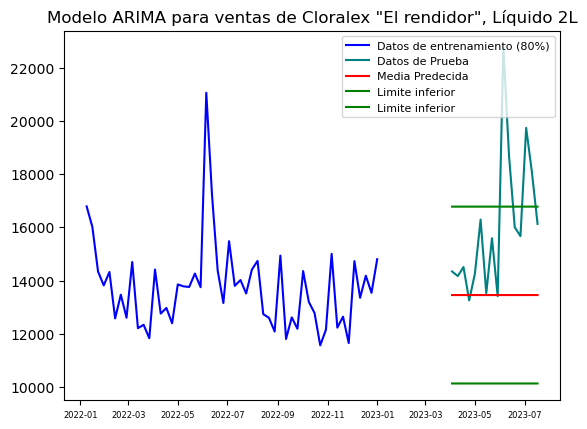

In [158]:
# graficando predicciones
import matplotlib.pyplot as plt

plt.plot(train, label = 'Datos de entrenamiento (80%)', color = 'blue')
plt.plot(test, label = 'Datos de Prueba', color = 'teal')
plt.plot(pred['predicted_mean'], label = 'Media Predecida', color = 'red')
plt.plot(pred['lower TOTAL_VALUE_SALES'], label = 'Limite inferior', color = 'green')
plt.plot(pred['upper TOTAL_VALUE_SALES'], label = 'Limite inferior', color = 'green')

plt.title('Modelo ARIMA para ventas de Cloralex "El rendidor", Líquido 2L')
plt.xticks(fontsize = 6)
plt.legend(loc = 'best', fontsize = 8)

plt.show()

Malisimo.. ajusta una medias muy planas como se veía ya en el DF, por lo cual se recurrira a otro modelo.

El modelo AR(p) que toma como base las medias moviles, aunque logra predecir subidas y bajadas siempre toma en cuenta el dato anterior, por lo que no puede ser utilizado para predecir meses enteros, solo la siguiente semana. Por lo que ha sido descartado.
### Nota:
Se probó el modelo con los 3 AIC mas bajos y ningun modelo fue convicente.

## Creación del Modelo De Regresion Lineal

In [161]:
# recordando el DF 
df_reg.head()

,WEEK,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1
0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,POLVO,SAFE BLEACH
1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,POLVO,SAFE BLEACH
2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,POLVO,SAFE BLEACH
3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,POLVO,SAFE BLEACH
4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,RECKITT,VANISH,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,POLVO,SAFE BLEACH


In [162]:
# Reduciendo a solo los datos del producto estrella
df_reg = df_reg[df_reg['ITEM'] == '0000075000622' ]
df_reg

,WEEK,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1
180,45-22,0000075000622,263.552,6116.936,96.575,TOTAL AUTOS SCANNING MEXICO,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
469,06-22,0000075000622,56.596,1464.729,103.277,TOTAL AUTOS AREA 2,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
759,48-22,0000075000622,318.484,7365.134,115.939,TOTAL AUTOS SCANNING MEXICO,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
1197,03-22,0000075000622,342.961,7170.990,128.981,TOTAL AUTOS SCANNING MEXICO,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
1254,23-22,0000075000622,45.702,997.776,121.872,TOTAL AUTOS AREA 6,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
...,...,...,...,...,...,...,...,...,...,...,...
121145,25-23,0000075000622,94.508,2092.237,152.925,TOTAL AUTOS AREA 2,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
121355,25-23,0000075000622,54.188,1199.585,136.494,TOTAL AUTOS AREA 3,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
121435,25-23,0000075000622,42.407,997.112,110.148,TOTAL AUTOS AREA 6,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
121648,25-23,0000075000622,342.456,7834.484,123.141,TOTAL AUTOS SCANNING MEXICO,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO


In [163]:
# Se ve bastante desordenado:
df_reg = df_reg.sort_values('WEEK')
df_reg.head()

,WEEK,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1
15672,01-22,0000075000622,99.568,2213.250,165.122,TOTAL AUTOS AREA 2,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
99644,01-22,0000075000622,63.955,1396.398,157.525,TOTAL AUTOS AREA 5,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
55907,01-22,0000075000622,52.627,1256.365,136.340,TOTAL AUTOS AREA 3,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
22386,01-22,0000075000622,371.038,8393.597,136.361,TOTAL AUTOS SCANNING MEXICO,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO
14538,01-22,0000075000622,58.178,1341.204,98.439,TOTAL AUTOS AREA 1,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO


In [164]:
# Concatenando con calendario para obtener las fechas no las semanas:
df_reg = df_reg.merge(calendario, on = 'WEEK', how ='inner')
df_reg.head()

,WEEK,ITEM,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1,YEAR,DATE
0,01-22,0000075000622,99.568,2213.250,165.122,TOTAL AUTOS AREA 2,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO,2022,2022-01-09
1,01-22,0000075000622,63.955,1396.398,157.525,TOTAL AUTOS AREA 5,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO,2022,2022-01-09
2,01-22,0000075000622,52.627,1256.365,136.340,TOTAL AUTOS AREA 3,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO,2022,2022-01-09
3,01-22,0000075000622,371.038,8393.597,136.361,TOTAL AUTOS SCANNING MEXICO,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO,2022,2022-01-09
4,01-22,0000075000622,58.178,1341.204,98.439,TOTAL AUTOS AREA 1,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO,2022,2022-01-09


In [165]:
# Eliminando las columnas que no seran variables dependientes X
df_reg.drop(columns = ['WEEK','ITEM','MANUFACTURER','BRAND','ITEM_DESCRIPTION','FORMAT','ATTR1','YEAR', 'REGION'], inplace = True)

# Cambiando el index
df_reg.index = df_reg['DATE']
df_reg.drop(columns = ['DATE'], inplace = True)
df_reg.head()

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES
DATE,,,
2022-01-09,99.568,2213.250,165.122
2022-01-09,63.955,1396.398,157.525
2022-01-09,52.627,1256.365,136.340
2022-01-09,371.038,8393.597,136.361
2022-01-09,58.178,1341.204,98.439


In [166]:
# Agrupando los datos por fechas
df_reg = df_reg.groupby('DATE').sum()
df_reg

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES
DATE,,,
2022-01-09,742.076,16787.194,958.012
2022-01-16,729.833,16019.410,960.249
2022-01-23,685.922,14341.980,912.495
2022-01-30,658.303,13819.164,879.834
2022-02-06,616.170,14324.646,824.143
...,...,...,...
2023-06-19,683.278,16001.298,869.268
2023-06-26,684.911,15668.968,864.818
2023-07-03,892.881,19734.475,1135.867


In [167]:
# Definiendo variables

y = df_reg['TOTAL_VALUE_SALES']
X = df_reg[['TOTAL_UNIT_SALES','TOTAL_UNIT_AVG_WEEKLY_SALES']]

In [168]:
# Division de entrenamiento y prueba
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [169]:
# Creacion del modelo
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
model

LinearRegression()

In [170]:
# Revisando betas o coeficientes
betas = model.coef_
print('Betas:',betas)

intercepto = model.intercept_
print(f'Intercepto: {intercepto:.3f}')

Betas: [28.27112614 -7.03953756]
Intercepto: 2656.613


In [171]:
# Revisando los P values y metricas del modelo para ver si es bueno
import statsmodels.api as sm

regresor = sm.OLS(y_train,x_train).fit()

# Objeto creado, imprimiento reporte
reporte = regresor.summary()
print(reporte)

                                 OLS Regression Results                                
Dep. Variable:      TOTAL_VALUE_SALES   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.520e+04
Date:                Mon, 20 Oct 2025   Prob (F-statistic):                    3.71e-84
Time:                        11:43:05   Log-Likelihood:                         -505.77
No. Observations:                  64   AIC:                                      1016.
Df Residuals:                      62   BIC:                                      1020.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

Las variables, como ya se sabía de hecho, son bastante correlacionadas, pero l mejor es el R2 tan alto. Parece que este modelo será mejor

In [176]:
# Obteniendo predicciones para X_test:

y_pred = model.predict(x_test)
print(y_pred)

[14593.00785518 16891.97618871 17855.47214698 12811.27695808
 13277.39956786 14158.73260108 12006.06197679 13657.09564958
 14274.84763443 13553.70431759 14723.12810018 12262.32678155
 13185.81359735 11962.87439288 14192.75844675 13199.94888979]


In [180]:
# Observando todo en un DF para mejor vizualización:
df_predicciones = pd.DataFrame({'Y_TEST':y_test, 'Y_PRED':y_pred})
df_predicciones = df_predicciones.sort_values('DATE')
df_predicciones

,Y_TEST,Y_PRED
DATE,,
2022-01-09,16787.194,16891.976189
2022-02-06,14324.646,14274.847634
2022-03-20,12339.900,12006.061977
2022-04-03,14412.628,13553.704318
2022-05-15,13761.720,13277.399568
2022-06-12,17234.296,17855.472147
2022-07-24,13517.198,14158.732601
2022-08-07,14739.827,14593.007855
2022-08-14,12739.971,12811.276958


Pues a simple vista este modelo ya se ve mucho mejor

In [182]:
# Evaluando metricas de efectividad del modelo
from sklearn.metrics import r2_score, mean_squared_error
print('R²:', r2_score(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

R²: 0.924601992899629
RMSE: 403.2471500377696


Perfecto, aunque este R2 calculado desde el modelo creado de SKlearn no cpincide con el creado desde el regresor de stats models, aun así sigue siendo bastante bueno, y aunque el RMSE tenga un margen de error alto de mas de 400, esto no es tan alto considerando que los totales de venta superan los 20000

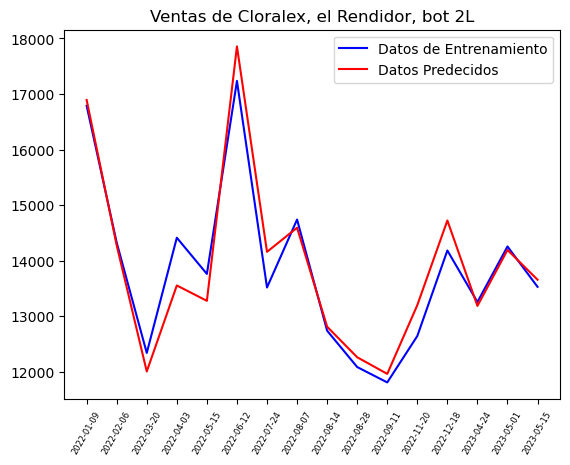

In [184]:
# Graficación de resultados:

plt.plot(df_predicciones['Y_TEST'], label = 'Datos de Entrenamiento', color = 'blue')
plt.plot(df_predicciones['Y_PRED'], label = 'Datos Predecidos', color='red')

plt.legend(loc='best')
plt.title('Ventas de Cloralex, el Rendidor, bot 2L')
plt.xticks(fontsize = 6, rotation = 60)
plt.show()

Aunque el modelo es absolutamente Bueno prediciendo, tomando variables del pasado, si observamos las fechas, train, test, split toma fechas de forma random, para predecir a partir de variables, sin embargo al ser este caso una serie de tiempo, no nos sirve para predecir el futuro, ya que no contamos con registro de las variables en el futuro.. entonces aunque sea un modelo muy bueno, fracasa en generar predicciones

# Creacion de Modelo SARIMAX
Se procedera a la creación de un modelo que convine la prescion de la regresion lineal y la capacidad de predecir con lineas de tiempo de ARIMA

In [186]:
# Creación de Variables X y Y pero ahora de manera lineal en el tiempo

# Entrenamiento:
X_train = df_reg[['TOTAL_UNIT_SALES','TOTAL_UNIT_AVG_WEEKLY_SALES']][:len_train]
Y_train = df_reg[['TOTAL_VALUE_SALES']][:len_train]

# Prueba
X_test = df_reg[['TOTAL_UNIT_SALES','TOTAL_UNIT_AVG_WEEKLY_SALES']][len_train:]
Y_test = df_reg[['TOTAL_VALUE_SALES']][len_train:]

In [188]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo = SARIMAX(Y_train,X_train, order=(1,1,1),seasonal_order=(1,1,1,52), #s=52 para semanas anuales
    enforce_stationarity=False, enforce_invertibility=False)

resultado = modelo.fit(disp=False)
print(resultado.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  TOTAL_VALUE_SALES   No. Observations:                   64
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                   0.000
Date:                            Mon, 20 Oct 2025   AIC                             14.000
Time:                                    11:46:24   BIC                                nan
Sample:                                         0   HQIC                               nan
                                             - 64                                         
Covariance Type:                              opg                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
TOTAL_UNIT_SALES               17.6205         -0       -inf      0.000      17.

In [190]:
# Predicción sobre el set de prueba
Y_pred = resultado.predict(start=len_train, end = len(df_reg)-1, exog=X_test)
Y_pred

64    14540.762541
65    13820.428269
66    14214.179052
67    13187.954144
68    14417.004292
69    15870.753692
70    13803.979460
71    15188.095056
72    12941.569942
73    21815.343144
74    17490.425824
75    15375.920934
76    15328.431845
77    19587.348994
78    17184.748727
79    15529.772413
Name: predicted_mean, dtype: float64

In [196]:
# Concatenando frames para evaluar si ya se registran subidas y bajadas

pred_sarimax = pd.DataFrame(Y_pred).reset_index()
pred_sarimax.drop(columns =['index'], inplace= True)

Y_test = Y_test.reset_index()

predicciones_sarimax= pd.concat([pred_sarimax, Y_test], axis = 1)
predicciones_sarimax.index = predicciones_sarimax['DATE']
predicciones_sarimax.drop(columns =['DATE'], inplace= True)
predicciones_sarimax

,predicted_mean,TOTAL_VALUE_SALES
DATE,,
2023-04-03,14540.762541,14342.120
2023-04-10,13820.428269,14169.518
2023-04-17,14214.179052,14509.728
2023-04-24,13187.954144,13255.948
2023-05-01,14417.004292,14255.439
2023-05-08,15870.753692,16291.479
2023-05-15,13803.979460,13528.950
2023-05-22,15188.095056,15590.251
2023-05-29,12941.569942,13415.909


Pinta bastante mejor, ya tiene la magia de tomar encuanta las variables X y tambien de seguir una linea de tiempo.

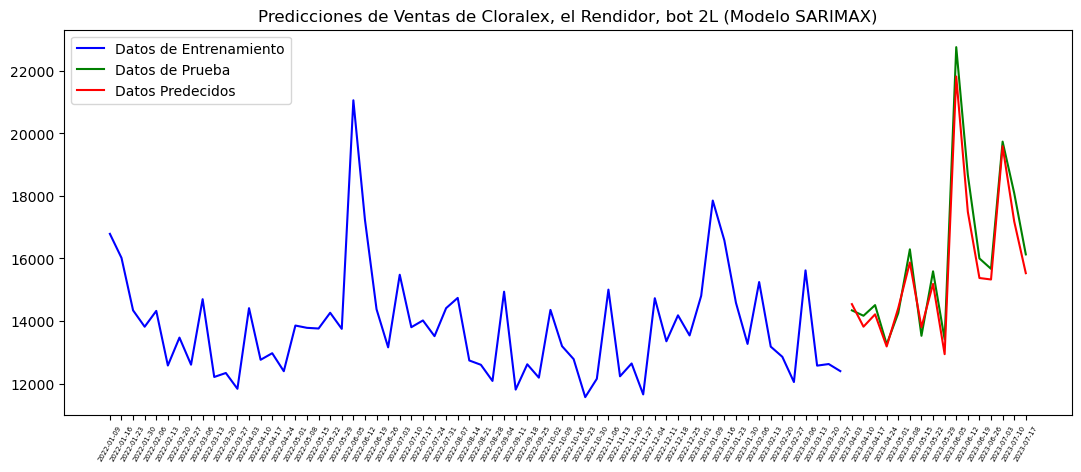

In [198]:
# Graficación de resultados SARIMAX:

plt.figure(figsize = (13,5))
plt.plot(Y_train['TOTAL_VALUE_SALES'], label = 'Datos de Entrenamiento', color = 'blue')
plt.plot(predicciones_sarimax['TOTAL_VALUE_SALES'], label = 'Datos de Prueba', color = 'green')
plt.plot(predicciones_sarimax['predicted_mean'], label = 'Datos Predecidos', color='red')

plt.legend(loc='best')
plt.title('Predicciones de Ventas de Cloralex, el Rendidor, bot 2L (Modelo SARIMAX)')
plt.xticks(fontsize = 5, rotation = 60)
plt.show()

Tal como se veía en la Tabla y ahora en la grafica, Ahora si podemos estar contentos con nuestro modelo. prediciendo bastante bien con ayuda de las variables extra.

# Predicciones para los siguientes dos meses:

Como no contamos con DATA para la variable X para los proximos 2 meses, tendriamos que simularla...

In [201]:
# Creando un Data Frame para que funcione como variable X del Futuro simulado

df_reg.index = pd.to_datetime(df_reg.index)
future_dates = pd.date_range(start=df_reg.index[-1] + pd.offsets.Week(1),periods=8, freq='W')
# 8 semanas = dos meses, frecuencia semanal

X_future = pd.DataFrame(index=future_dates)   #creando solo el indice con el shape de future_dates
X_future['TOTAL_UNIT_SALES'] = X['TOTAL_UNIT_SALES'].iloc[-1] * (1.02 ** np.arange(1, 9))
X_future['TOTAL_UNIT_AVG_WEEKLY_SALES'] = X['TOTAL_UNIT_AVG_WEEKLY_SALES'].iloc[-1] * (1.01 ** np.arange(1, 9))
# Eso simula un aumento progresivo del 15 % y 8 % semanal, respectivamente.

X_future

,TOTAL_UNIT_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES
2023-07-30,724.705920,918.723270
2023-08-06,739.200038,927.910503
2023-08-13,753.984039,937.189608
2023-08-20,769.063720,946.561504
2023-08-27,784.444994,956.027119
2023-09-03,800.133894,965.587390
2023-09-10,816.136572,975.243264
2023-09-17,832.459304,984.995697


Honestamente es muy curioso no tomar ninguna media para predecir los datos del futuro, pero es que justamente se quieren evitar datos planos, ya que no se comporta asi la venta en ningun periodo del tiempo. siempre tiene la tendencia a subir y bajar mucho mas que un 15%. Considero importante ajustar esta parte del codigo de acuerdo al criterio de cada cientifico o analista, quiza incluso podrian generarse diferentes escenarios: Pesimista u optimista.

In [203]:
# Aplicando sarimax a los nuevos datos:
predicciones_futuras = resultado.forecast(steps=8, exog=X_future)
predicciones_futuras

64    16914.632791
65    16605.555714
66    16918.238783
67    16993.611624
68    17645.269504
69    17939.707798
70    18030.271078
71    18446.287725
Name: predicted_mean, dtype: float64

In [239]:
# concatenando DFs
predicciones_futuras = pd.DataFrame(predicciones_futuras)

# Modificando el index de las predicciones
new_index = X_future.index
predicciones_futuras['DATE'] = new_index
predicciones_futuras.index = predicciones_futuras['DATE']
predicciones_futuras.drop(columns=['DATE'], inplace= True)

predicciones_futuras_DF = pd.concat([predicciones_futuras, X_future], axis = 1)
predicciones_futuras_DF

,predicted_mean,TOTAL_UNIT_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES
2023-07-30,16914.632791,724.705920,918.723270
2023-08-06,16605.555714,739.200038,927.910503
2023-08-13,16918.238783,753.984039,937.189608
2023-08-20,16993.611624,769.063720,946.561504
2023-08-27,17645.269504,784.444994,956.027119
2023-09-03,17939.707798,800.133894,965.587390
2023-09-10,18030.271078,816.136572,975.243264
2023-09-17,18446.287725,832.459304,984.995697


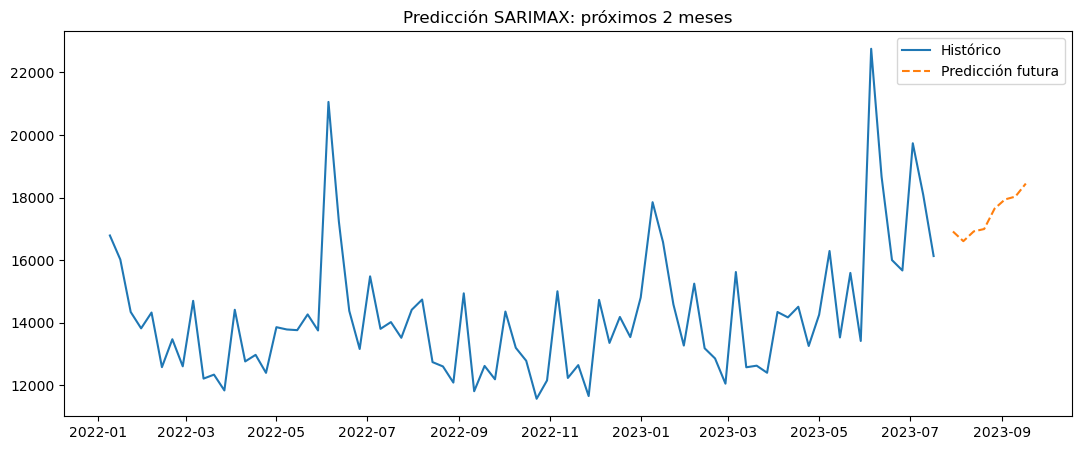

In [241]:
plt.figure(figsize=(13,5))
plt.plot(df_reg['TOTAL_VALUE_SALES'], label='Histórico')
plt.plot(predicciones_futuras_DF['predicted_mean'], label='Predicción futura', linestyle='--')
plt.legend()
plt.title('Predicción SARIMAX: próximos 2 meses')
plt.show()

# Conclusiones:
- Los modelos de serie de tiempo basados en la media movil MA son bastante buenos predicciendo pero solo una fecha.
- Los Modelos como ARIMA, son buenos prediciendo pero siempre tendran un intervalo de confianza y calcularan de forma muy plana, por lo cual no es útil si nuestros datos son muy moviles a traves del tiempo.
- Los modelos de regresion lineal son fabulosos interpretando datos a partir de variables, sin embargo no son del todo utiles en seies de tiempo, a menos que inventemos las variables de entrada, que bien pueden estar calculadas de acuerdo a tendencias tambien.
- El model SARIMAX que convina ARIMA con Regresion Lineal ha sido maravilloso.
- Es demasiado importante tener un criterio propio y hacer ciencia, o quiza tener dos escenarios posibles con las variables independientes X.